# Sea Level Data Visualizations
* This Takes the original Source data from NASA for one visualization option and takes the other scrubbed data to give a visualization of the complete timeline of sea data. This is because Sea level data can be easily misrepresented.  Outliers may be caused from the variety of satellites used over the past and seasonal sea patterns.  NASA Scientists state ice loss is the largest contributor to sea level rise but ice melting data is in ShapeFile format.  Analyzing fewer years gave a completely opposite picture to sea level data.

*__Input Files__: sealevel_data__all_1993-2020.csv

*__Output Visualizations__: Sea Level over Time 1993-2020(in mm), Sea Level over Time 1993-2015 (in mm)

*__Output Files__: rm_outliers_grouped_sealevel_data.csv 

*__Output Visualization__: Sea Level over Time (in mm) removed Outliers 

*__Input Files__: data/sealevel_data__all_1993-2020.csv

*__Output Visualization__: Sea Level over Time (in mm) removed Outliers

*__Output Files__: rm_outliers_sealevel_1993-2020.csv


### Melissa Wright

In [126]:
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [127]:
#Import scikit learn

from sklearn.linear_model import LinearRegression

### Linear Regression from the data that looks at all of the gmsl from 1993-2020

In [128]:
data = pd.read_csv('data/sealevel_data__all_1993-2020.csv') # load data set
data.head(2)
data.tail(2)

,GMSL,Year
994,98.39,2020
995,97.91,2020


In [129]:
X = data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


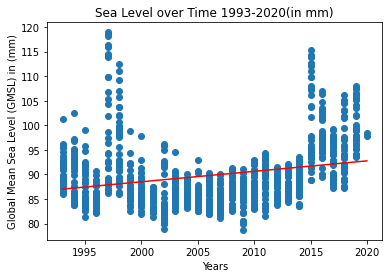

In [130]:

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Years')
plt.ylabel('Global Mean Sea Level (GMSL) in (mm)')
plt.title('Sea Level over Time 1993-2020(in mm)')
fig1 = plt.gcf()
fig1.savefig("images/sealevelovertime1993-2020.png", bbox_inches='tight')


This visualization shows the model looking at every datapoint taken for the global mass sea level average as it was measured each day. 

### Linear Regression from the data that takes ONLY the mean of the gmsl from 1993-2015 Grouped by year

In [131]:
#Data 
data_1 = pd.read_csv('data/sealevel_data.csv') # load data set
data_1.head(2)

,Year,GMSL
0,1993,90.471622
1,1994,89.516216


In [132]:
data_1.tail(2)

,Year,GMSL
21,2014,88.426667
22,2015,100.599189


In [133]:

X = data_1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data_1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


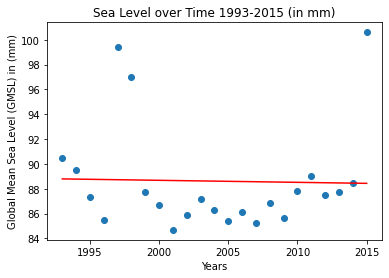

In [134]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Years')
plt.ylabel('Global Mean Sea Level (GMSL) in (mm)')
plt.title('Sea Level over Time 1993-2015 (in mm)')
fig2 = plt.gcf()
fig2.savefig("images/sealevel_overtime_1993-2015.png", bbox_inches='tight')

The sea level from 1993 - 2015 showing inconclusive trend over time. 


The GMSL is a 1-dimensional time series of globally averaged Sea Surface Height Anomalies (SSHA) from TOPEX/Poseidon, Jason-1, OSTM/Jason-2 and Jason-3. It starts in September 1992 to present, with a lag of up to 4 months. All biases and cross-calibrations have been applied to the data so SSHA are consistent between satellites. Data are reported as changes relative to January 1, 1993 and are 2-month averages. Glacial Isostatic Adjustment (GIA) has been applied. These data are available in ASCII format. Reference: Beckley et al., 2017,

This is the “uncertainty margin,” or the range from the mean (average) within which there is a high probability that the true number resides. For example, when we say that global mean sea level for a particular month is 50mm +/- 4 mm, the true value for that month has a high probability of being between 46 and 54 mm. The uncertainty margin exists both because of sea level variability (sea level above the first point in the time series) in the ocean and the accuracy with which we measure the individual values. https://sealevel.nasa.gov/understanding-sea-level/key-indicators/global-mean-sea-level/  Source: https://podaac-tools.jpl.nasa.gov/drive/files/allData/merged_alt/L2/TP_J1_OSTM/global_mean_sea_level/GMSL_TPJAOS_4.2_199209_202001.txt

- Melissa Wright

## Let's Try removing outliers 

In [135]:
from scipy import stats
from scipy.stats import zscore
import numpy as np


In [136]:
print(data_1)

    Year        GMSL
0   1993   90.471622
1   1994   89.516216
2   1995   87.334722
3   1996   85.473243
4   1997   99.442432
5   1998   96.977297
6   1999   87.769459
7   2000   86.657297
8   2001   84.688378
9   2002   85.895278
10  2003   87.178919
11  2004   86.263784
12  2005   85.427838
13  2006   86.161389
14  2007   85.265946
15  2008   86.838889
16  2009   85.634054
17  2010   87.830811
18  2011   89.016757
19  2012   87.514324
20  2013   87.777297
21  2014   88.426667
22  2015  100.599189


In [137]:
z_scores = stats.zscore(data_1)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)


In [138]:
new_df_1 = data_1[filtered_entries]

In [139]:
print(new_df_1)


    Year       GMSL
0   1993  90.471622
1   1994  89.516216
2   1995  87.334722
3   1996  85.473243
5   1998  96.977297
6   1999  87.769459
7   2000  86.657297
8   2001  84.688378
9   2002  85.895278
10  2003  87.178919
11  2004  86.263784
12  2005  85.427838
13  2006  86.161389
14  2007  85.265946
15  2008  86.838889
16  2009  85.634054
17  2010  87.830811
18  2011  89.016757
19  2012  87.514324
20  2013  87.777297
21  2014  88.426667


In [140]:
new_df_1.to_csv("data/rm_outliers_grouped_sealevel_data.csv", index = False, header = True)

In [141]:
X = new_df_1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = new_df_1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

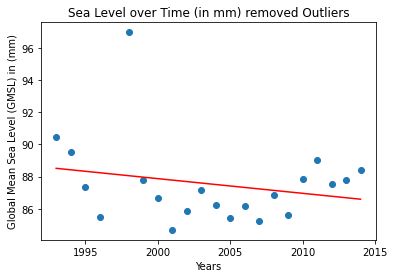

In [142]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Years')
plt.ylabel('Global Mean Sea Level (GMSL) in (mm)')
plt.title('Sea Level over Time (in mm) removed Outliers')
fig3 = plt.gcf()
fig3.savefig("images/sealevel_removed_outliers-1993-2015.png", bbox_inches='tight')

In [143]:
data_2 = pd.read_csv('data/sealevel_data__all_1993-2020.csv') 

In [144]:
print(data_2)

       GMSL  Year
0     92.66  1993
1     95.39  1993
2     92.29  1993
3     96.20  1993
4     94.64  1993
..      ...   ...
991  105.40  2019
992  101.96  2019
993  100.10  2019
994   98.39  2020
995   97.91  2020

[996 rows x 2 columns]


In [145]:
z_scores = stats.zscore(data_2)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.5).all(axis=1)


In [146]:
new_df_2 = data_2[filtered_entries]

In [147]:
print(new_df_2)


       GMSL  Year
0     92.66  1993
1     95.39  1993
2     92.29  1993
3     96.20  1993
4     94.64  1993
..      ...   ...
991  105.40  2019
992  101.96  2019
993  100.10  2019
994   98.39  2020
995   97.91  2020

[963 rows x 2 columns]


Notice the drop in number of rows. Now let's try to visualize it

In [148]:
X = new_df_2.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = new_df_2.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

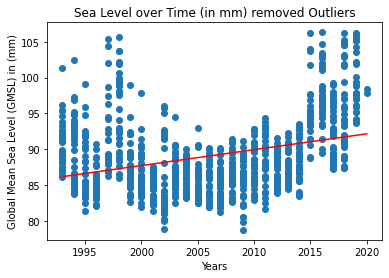

In [149]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Years')
plt.ylabel('Global Mean Sea Level (GMSL) in (mm)')
plt.title('Sea Level over Time (in mm) removed Outliers')
fig4 = plt.gcf()
fig4.savefig("images/sealevel__removed_outliers-1993-2020.png", bbox_inches='tight')

In [101]:
new_df_2.to_csv("data/rm_outliers_sealevel_1993-2020.csv", index = False, header = True)